# Logistic 模型

## I.基本思想
其实这里讲的思想还是比较粗暴的，事件发生的比值为：
$$
odds = \frac{p}{1-p}
$$
其对数为：
$$
logit(p) = log(\frac{p}{1-p})
$$
logistic回归假设：
$$
logit(p) = w^{T}x
$$
由此可以反解，得到
$$
p =\sigma(w^{T}x)
$$
这就是说，如果我能找到足够好的参数w的话，就可以用这个函数来得到数据点x“发生”的概率p和不发生的概率1-p（这里是把二分分类软转化为“发生”和“不发生”了），$\sigma$就是我们熟悉的sigmoid函数。

下面看看怎么进行训练，训练的目标自然是要求p能够正确反应x是否发生。对于有监督学习，x有两种标记情况，发生或者不发生，logistic不会像感知机那样，在标签说明x不发生后直接标记这个数据一定不发生，而是认为，这个数据有p的概率发生，1-p的概率不发生；反过来，对于标签说明x发生，它会认为x有1-p的概率发生。把发生/不发生的标签取为1/0，就可以把概率记为：
$$
P(y|p) = p^{y}(1-p)^{1-y}
$$
训练目标就是让这个函数最大，也就是最小化负对数：
$$
Cross Entropy = - [ylogp +(1-y)log(1-p)]
$$
称为交叉熵。感知机的监督过程体现在求和只对分错了的数据求，这里的监督过程体现在梯度上，交叉熵对参数w的导数是p-y，这里面有和监督标签有关的y，所以梯度下降过程会一直有y的监督。


训练集大小: 800, 测试集大小: 200
Iteration 0, Loss: 0.6931
Iteration 100, Loss: 0.2846
Iteration 200, Loss: 0.2557
Iteration 300, Loss: 0.2463
Iteration 400, Loss: 0.2420
Iteration 500, Loss: 0.2396
Iteration 600, Loss: 0.2381
Iteration 700, Loss: 0.2371
Iteration 800, Loss: 0.2363
Iteration 900, Loss: 0.2357
训练集准确率: 0.9012
测试集准确率: 0.9000


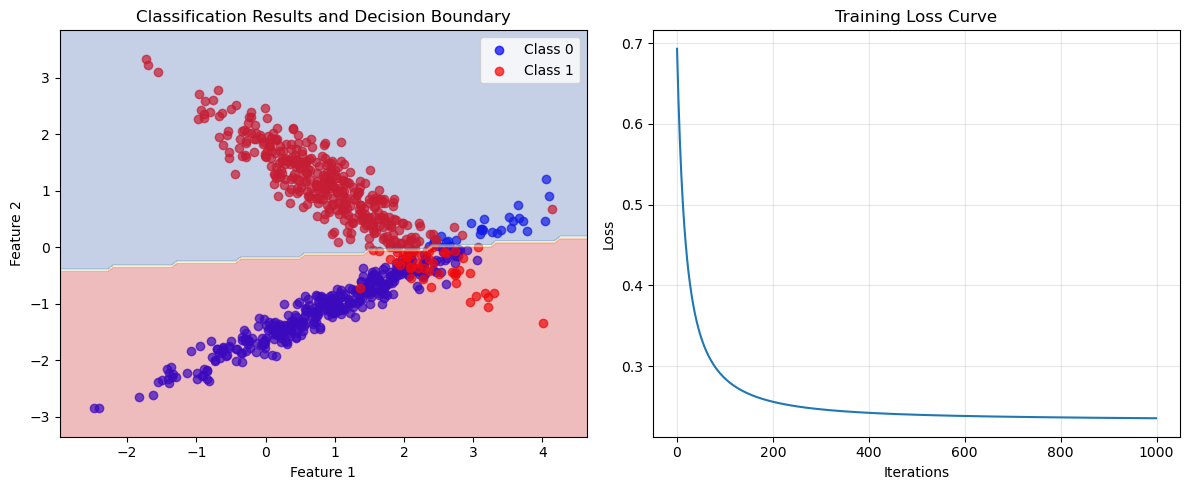

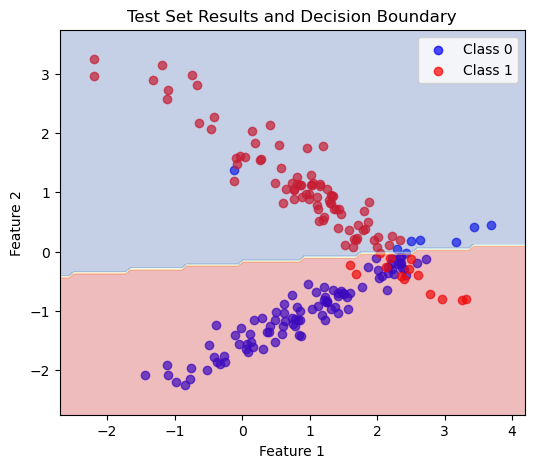


测试集前10个样本的预测概率:
样本 0: 真实标签=1, 预测概率=0.8848, 预测标签=1
样本 1: 真实标签=0, 预测概率=0.0041, 预测标签=0
样本 2: 真实标签=0, 预测概率=0.2041, 预测标签=0
样本 3: 真实标签=0, 预测概率=0.0084, 预测标签=0
样本 4: 真实标签=0, 预测概率=0.0050, 预测标签=0
样本 5: 真实标签=1, 预测概率=1.0000, 预测标签=1
样本 6: 真实标签=1, 预测概率=0.0559, 预测标签=0
样本 7: 真实标签=1, 预测概率=0.7072, 预测标签=1
样本 8: 真实标签=0, 预测概率=0.0530, 预测标签=0
样本 9: 真实标签=0, 预测概率=0.2094, 预测标签=0


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

def sigmoid(z):
    """Sigmoid function"""
    return 1 / (1 + np.exp(-np.clip(z, -250, 250)))

def logistic_regression(X, y, learning_rate=0.1, num_iterations=1000, verbose=False):
    """
    Simple logistic regression implementation
    X: feature matrix (m_samples, n_features)
    y: label vector (m_samples,)
    Returns: trained weights, bias and cost history
    """
    m, n = X.shape
    w = np.zeros(n)
    b = 0
    costs = []
    
    for i in range(num_iterations):
        # Forward propagation
        z = np.dot(X, w) + b
        y_pred = sigmoid(z)
        
        # Compute cost
        cost = -np.mean(y * np.log(y_pred + 1e-8) + (1 - y) * np.log(1 - y_pred + 1e-8))
        costs.append(cost)
        
        # Compute gradients
        dw = (1/m) * np.dot(X.T, (y_pred - y))
        db = (1/m) * np.sum(y_pred - y)
        
        # Update parameters
        w -= learning_rate * dw
        b -= learning_rate * db
        
        if verbose and i % 100 == 0:
            print(f"Iteration {i}, Loss: {cost:.4f}")
    
    return w, b, costs

def predict(X, w, b, threshold=0.5):
    """Prediction function"""
    probabilities = sigmoid(np.dot(X, w) + b)
    return (probabilities >= threshold).astype(int), probabilities

# Visualization functions
def plot_results(X, y, w, b, costs):
    """Plot classification results and loss curve"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    # Plot classification results
    ax1.scatter(X[y == 0, 0], X[y == 0, 1], c='blue', label='Class 0', alpha=0.7)
    ax1.scatter(X[y == 1, 0], X[y == 1, 1], c='red', label='Class 1', alpha=0.7)
    
    # Plot decision boundary
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), 
                         np.linspace(y_min, y_max, 100))
    
    Z, _ = predict(np.c_[xx.ravel(), yy.ravel()], w, b)
    Z = Z.reshape(xx.shape)
    
    ax1.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)
    ax1.set_xlabel('Feature 1')
    ax1.set_ylabel('Feature 2')
    ax1.set_title('Classification Results and Decision Boundary')
    ax1.legend()
    
    # Plot loss curve
    ax2.plot(costs)
    ax2.set_xlabel('Iterations')
    ax2.set_ylabel('Loss')
    ax2.set_title('Training Loss Curve')
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
# Example usage
if __name__ == "__main__":
    # Generate sample data
    np.random.seed(42)
    X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, 
                               n_informative=2, n_clusters_per_class=1)
    
    # 正确的做法：划分训练集和测试集
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    print(f"训练集大小: {X_train.shape[0]}, 测试集大小: {X_test.shape[0]}")
    
    # 在训练集上训练模型
    w, b, costs = logistic_regression(X_train, y_train, verbose=True)
    
    # 在训练集上评估（仅供参考，可能过拟合）
    y_pred_train, prob_train = predict(X_train, w, b)
    train_accuracy = np.mean(y_pred_train == y_train)
    print(f"训练集准确率: {train_accuracy:.4f}")
    
    # 在测试集上评估（真正的性能指标）
    y_pred_test, prob_test = predict(X_test, w, b)
    test_accuracy = np.mean(y_pred_test == y_test)
    print(f"测试集准确率: {test_accuracy:.4f}")
    
    # 可视化结果（可以分别显示训练集和测试集的结果）
    plot_results(X_train, y_train, w, b, costs)  # 训练集可视化
    
    # 也可以创建测试集的可视化
    plt.figure(figsize=(6, 5))
    plt.scatter(X_test[y_test == 0, 0], X_test[y_test == 0, 1], c='blue', label='Class 0', alpha=0.7)
    plt.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], c='red', label='Class 1', alpha=0.7)
    
    # 绘制决策边界
    x_min, x_max = X_test[:, 0].min() - 0.5, X_test[:, 0].max() + 0.5
    y_min, y_max = X_test[:, 1].min() - 0.5, X_test[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), 
                         np.linspace(y_min, y_max, 100))
    
    Z, _ = predict(np.c_[xx.ravel(), yy.ravel()], w, b)
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Test Set Results and Decision Boundary')
    plt.legend()
    plt.show()
    
    # 显示测试集的一些预测结果
    print("\n测试集前10个样本的预测概率:")
    for i in range(min(10, len(y_test))):
        print(f"样本 {i}: 真实标签={y_test[i]}, 预测概率={prob_test[i]:.4f}, 预测标签={y_pred_test[i]}")